# Проект "Анализ игровой индустрии"

**Оглавление:**
- [Общая информация](#intro)
- [Цель проекта](#purpose)
- [План работы](#plan)
- [Предобработка данных](#processing)
- [Исследовательский анализ данных](#analysis)
- [Составление портрета пользователя](#portrait)
- [Составление гипотез](#hypothesis)
- [Вывод](#conclusion)

## Общая информация <a id='intro'></a>

### Исходные данные

 Файл games.csv. 
* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Цель проекта: <a id='purpose'></a>
* Выявить определяющие успешность игры закономерности

## План работы: <a id='plan'></a>
* Предобработка данных
* Исследовательский анализ данных
* Анализ данных


## Предобработка данных <a id='processing'></a>

In [1]:
#импортируем необходимые библиотеки 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np


In [2]:
# загружаем нужный файл
data = pd.read_csv('C:/Users/user/Desktop/Work/Game industry/games.csv')

In [3]:
# смотрим основную информацию
data.info()
old_shape=data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# переименовываем столбцы
data.columns = data.columns.str.lower()
# проверяем правильность
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#смотрим первые строки df
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# удаляем пропуски в столбце"year_of_release", так как эти данные нельзя логично заменить
data = data.dropna(subset=['year_of_release','name'])
# Меняем тип данных на целочисленный для удобства работы в дальнейшем
data['year_of_release']=data['year_of_release'].astype('int')


In [7]:
#смотрим уникальные данные в категорийных столбцах
print(data['rating'].unique())
print()
print(data['year_of_release'].sort_values().unique())
print()
print(data['critic_score'].unique())
print()
print(data['user_score'].unique())



['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016]

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2

In [8]:
# считаем количество  пропусков в столбцах
print('rating пропусков:',data['rating'].isna().sum(),'=',round(data.rating.isna().mean()*100),'%')
print('critic_score пропусков:',data['critic_score'].isna().sum(),'=',round(data.critic_score.isna().mean()*100),'%')
print('user_score пропусков:',data['user_score'].isna().sum(),'=',round(data.user_score.isna().mean()*100),'%')
print(data.loc[data['user_score']=='tbd']['user_score'].value_counts())


rating пропусков: 6676 = 41 %
critic_score пропусков: 8461 = 51 %
user_score пропусков: 6605 = 40 %
tbd    2376
Name: user_score, dtype: int64


В столбце "user_score" присутствует значение "tbd", в данном контексте оно скорее всего обозначает "будет определено позже". Для исследования оно равнозначно значению "nan". В столбцах "rating", "critic", и "user_score" слищком много пропусков чтобы их можно было удалить безболезненно для исследования. В столбце "rating" оставляем пропуски без изменений, в остальных заменяем пропуски и "tbd" на медианное значение.


In [9]:
# В столбце rating меняем пропуски на тип unknown
data['rating']=data['rating'].fillna('unknown')

In [10]:
# заменяем 'tbd' на пропуски. это необходимо для приведения типа данных к числовым 
data.loc[data['user_score'] == 'tbd', 'user_score'] = "NaN"
#меняем тип данных на float
data['user_score'] = data['user_score'].astype('float')
# смотрим результат
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [11]:
# Считаем суммарные продажи в мире
data['sum_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [12]:
#Проверяем файл на явные дубликаты
print(data.duplicated().sum())

0


In [13]:
# Проверяем количество отброшенных данных
new_shape=data.shape[0]
new_shape / old_shape

0.9837870176488184

## Исследовательский анализ данных <a id='analysis'></a>


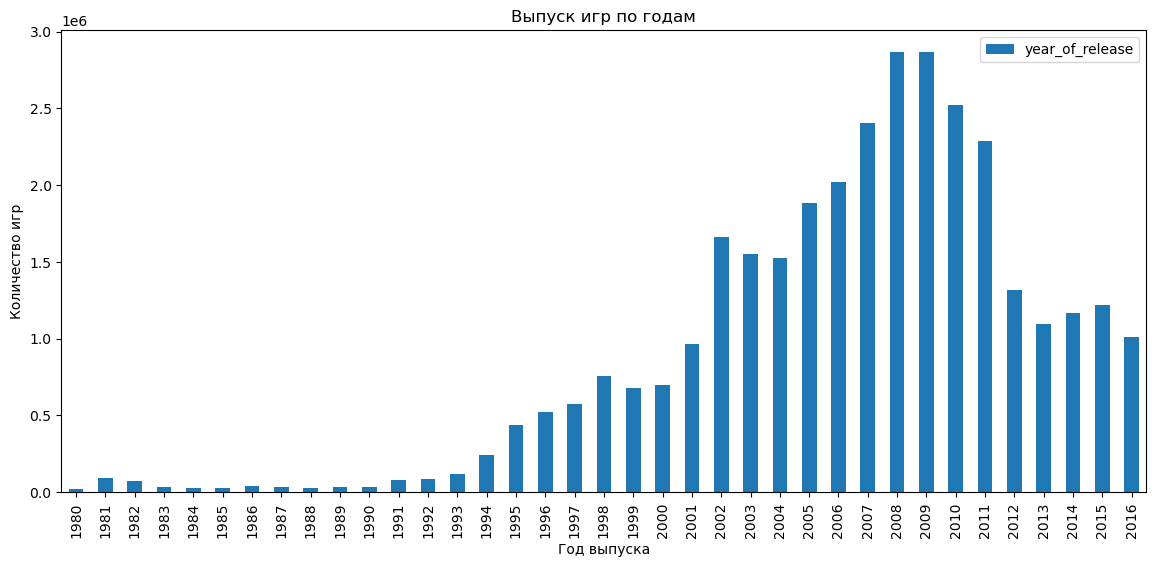

In [14]:
#Смотрим количество игр выпущенных в каждом году
data.groupby('year_of_release')[['year_of_release']].sum().plot(kind='bar', rot=90,figsize=(14,6))
plt.title('Выпуск игр по годам')
plt.xlabel('Год выпуска') 
plt.ylabel('Количество игр')
plt.show()

* За 37 лет количество выпускаемых игр увеличилось на порядки. Для составления прогноза нужно определить период оценки

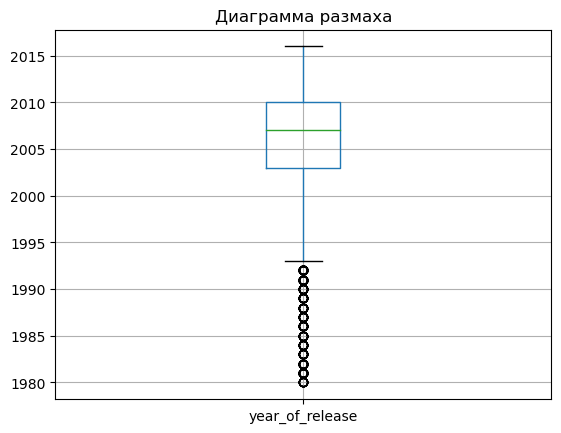

In [15]:
#строим диаграмму размаха
data.boxplot('year_of_release')
plt.title('Диаграмма размаха')
plt.show()

Данные до 1993 года являются выбросами, они не значимы для анализа

In [16]:
#Создаем список платформ с продажами
name=[]
sales=[]
for row in data['platform'].unique():
    sale=data.loc[data['platform']==row, 'sum_sales'].sum()
    name.append(row)
    sales.append(sale)

platform_sales = pd.DataFrame(list(zip(name, sales)),columns =['name', 'sales'])
#считаем медианную продажу
plat_median=platform_sales['sales'].median()
#выбираем платформы с высокими продажами
platform_name= platform_sales.query('sales >= @plat_median')
name=platform_name['name']

In [17]:
platform_sales.sort_values('sales')

,name,sales
30,PCFX,0.03
29,GG,0.04
28,3DO,0.10
27,TG16,0.16
25,WS,1.42
26,NG,1.44
24,SCD,1.86
21,DC,15.95
20,GEN,28.35
23,SAT,33.59


In [18]:
#Для анализа существования срока платформ возьмем половину наиболее успешных по продажам
data_sales = data.query('platform in @name')
# Считаем среднее время существования игровых платформ
years_old=0
quantity=0
for row in data_sales['platform'].unique():
    old=data.loc[data['platform']==row, 'year_of_release'].max()-\
    data.loc[data['platform']==row, 'year_of_release'].min()
    years_old +=old
    quantity +=1
  
  
print('Среднее время существования платформы равно:',years_old/quantity)  

Среднее время существования платформы равно: 11.4375


* Среднее время существования успешных платформ не менее 11 лет. Для исследования возьмем срок в 5 лет до даты прогноза - данные с 2012года.

In [19]:
data_filter=data.query('year_of_release>=2012')
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int32  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  sum_sales        2886 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 281.8+ KB


In [20]:
# составляем сводную таблицу по платформам и годам
pivot= data_filter.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
pivot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Из сводной таблицы видно что часть платформ для игр перестала поддерживаться, отсечем платформы для которых не выпускали игры в 2016г.

In [21]:
pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2012 to 2016
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3DS     5 non-null      float64
 1   DS      2 non-null      float64
 2   PC      5 non-null      float64
 3   PS3     5 non-null      float64
 4   PS4     4 non-null      float64
 5   PSP     4 non-null      float64
 6   PSV     5 non-null      float64
 7   Wii     5 non-null      float64
 8   WiiU    5 non-null      float64
 9   X360    5 non-null      float64
 10  XOne    4 non-null      float64
dtypes: float64(11)
memory usage: 480.0 bytes


In [24]:
# создаем список актуальных платформ
actual_name = pivot.query('year_of_release ==2016').dropna(axis=1)
actual_name = actual_name.columns.values.tolist ()
actual_name

['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

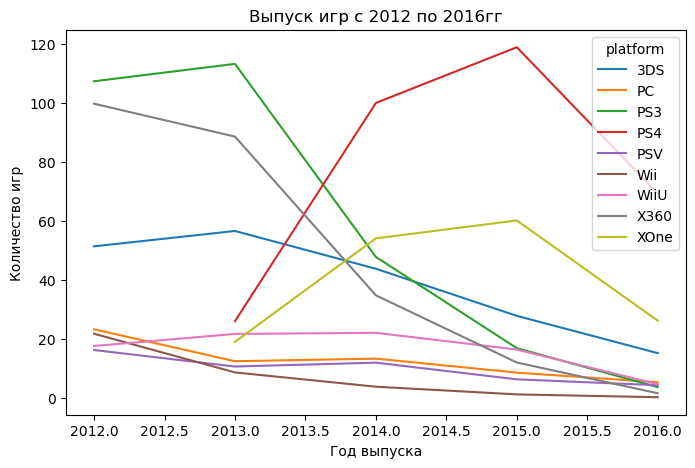

In [25]:
# фильтруем данные
data_filter = data_filter.query('platform in @actual_name')

# строим график по обновленным данным
data_filter.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').plot(figsize=(8,5))
plt.title('Выпуск игр с 2012 по 2016гг')
plt.xlabel('Год выпуска') 
plt.ylabel('Количество игр')
plt.show()

Судя по графику в 2016году у всех платформ почти полное падение продаж . Но данные за этот год неполные. Проверяем данные в этом году.

In [26]:
# Смотрим соотношение продаж в 2015г и 2016г
data_2016 = data_filter.query('year_of_release==2016')
data_2015 = data_filter.query('year_of_release==2015')
print(data_2016.sum_sales.sum()/data_2015.sum_sales.sum()*100)

48.51041588889718


 В 2016 сумма продаж составляет около половины от суммы 2015г, скорее всего предоставлены данные за полгода. На этот год нужно обратить особое внимание чтобы неполные данные не повлияли на результат исследования.

In [27]:
# Строим сводную таблицу по отфильтрованным данным
data_filter.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2012,51.36,23.22,107.36,NaN,16.19,21.71,17.56,99.74,NaN
2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


* По графику и сводной таблице можно сделать вывод что последние 5 лет наблюдается падение продаж на большинстве платформ. Так как данные предоставлены за полгода для примерной оценки надо брать сумму продаж в 2016 вдвое больше. При этом практически у всех платформ все равно имеется динамика к снижению, исключением являются новые платформы XOne и PS4. При этом продажи для платформы PS4 почти вдвое выше чем у XOne. Именно на них стоит ориентироваться, как на потенциально прибыльные проекты.

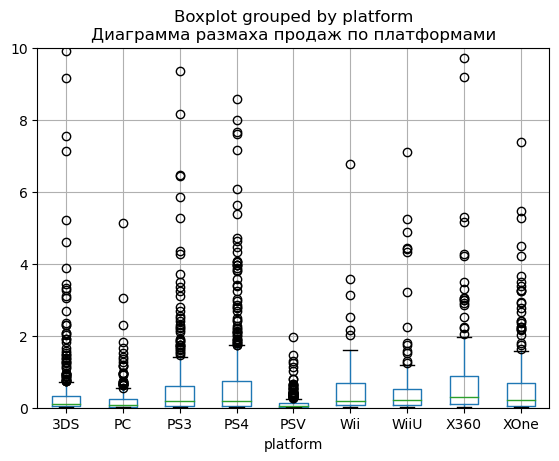

In [28]:
# строим диаграмму размаха продаж по платформам
data_filter.boxplot('sum_sales', by='platform')
plt.ylim([0,10])
plt.title('Диаграмма размаха продаж по платформами')
plt.show;

    

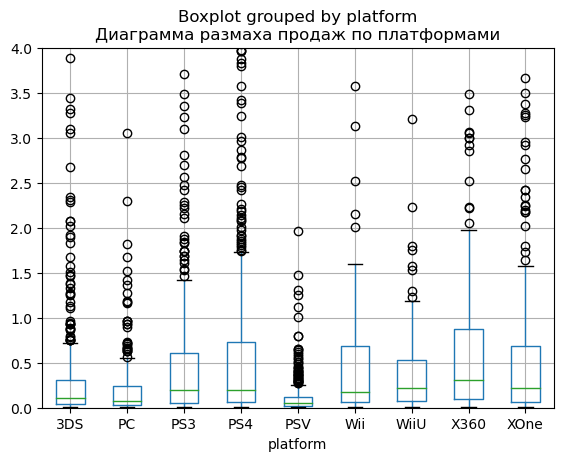

In [29]:
# меняем масштаб по оси у для детализации
data_filter.boxplot('sum_sales', by='platform')
plt.ylim([0,4])
plt.title('Диаграмма размаха продаж по платформами')
plt.show;

У платформ лидеров продаж (Xone и PS4) наблюдается схожий межквартильный размах, но у PS4 больше выбросов. Именно эти хорошо продающиеся игры определяют большую прибыльность платформы.

3DS значение корелляция = 0.32080286953607856


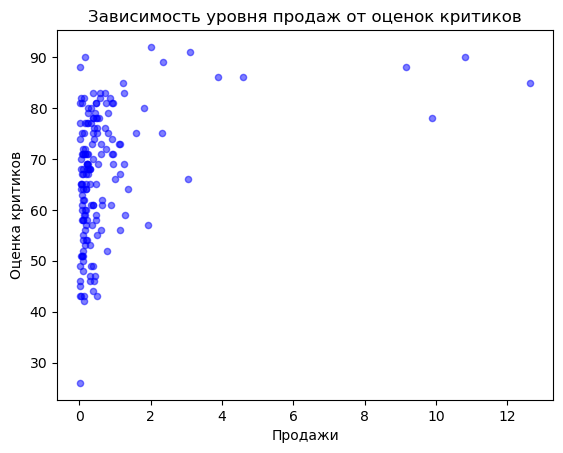

PC значение корелляция = 0.23724324311567907


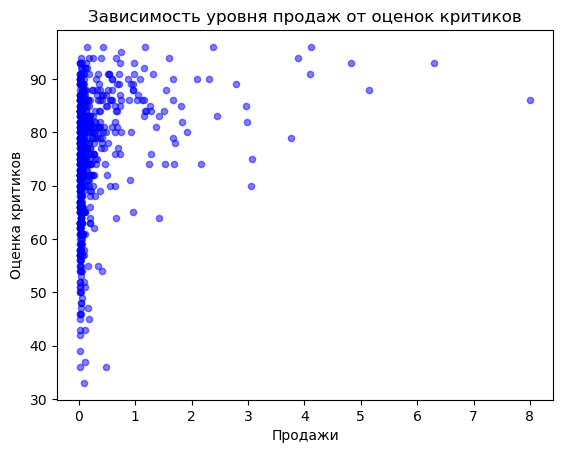

PS3 значение корелляция = 0.33149725926295903


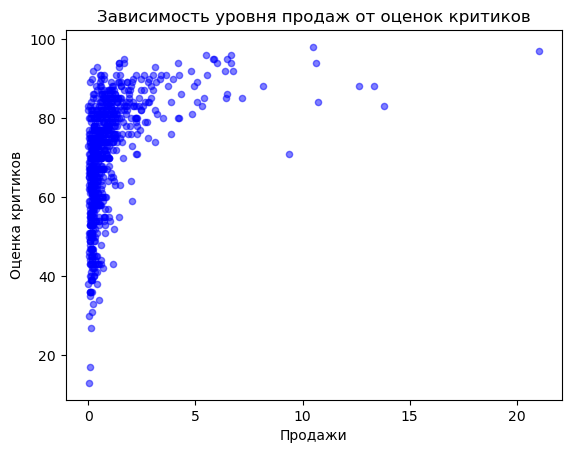

PS4 значение корелляция = 0.40656790206178123


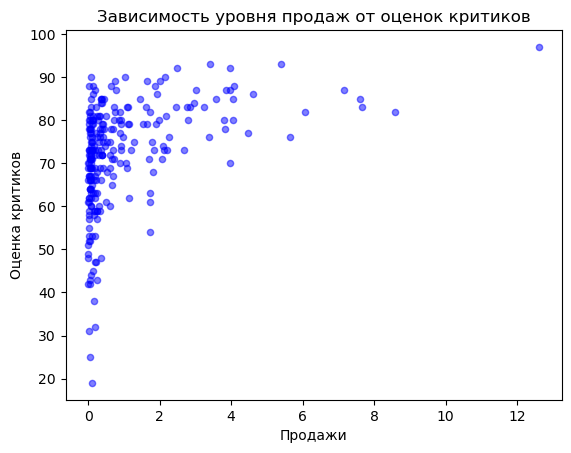

PSV значение корелляция = 0.0944878992931617


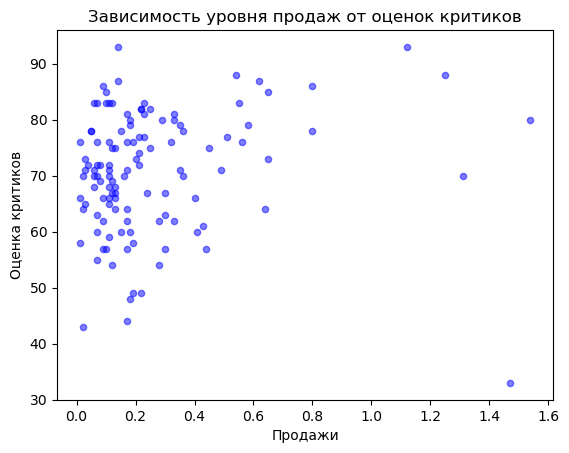

Wii значение корелляция = -0.42434130110774954


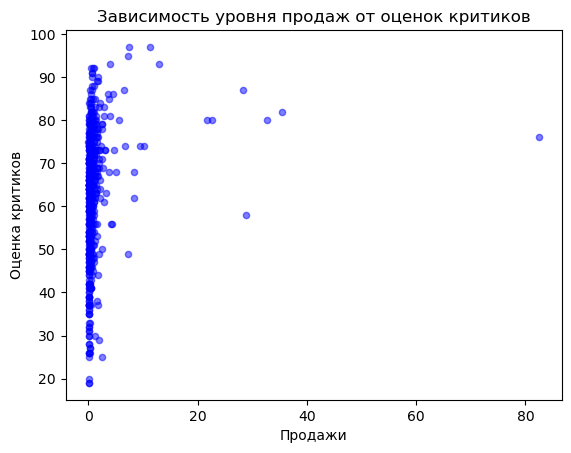

WiiU значение корелляция = 0.348379760120175


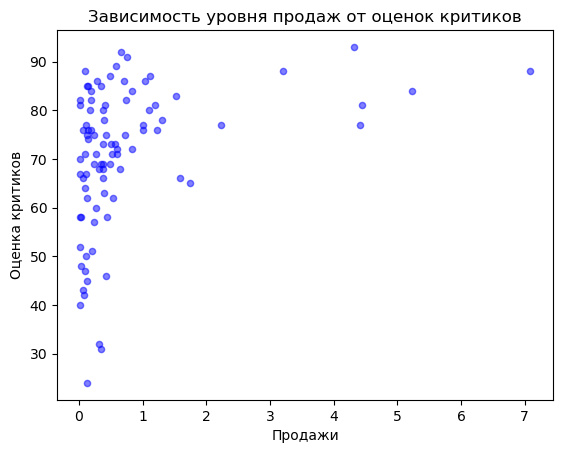

X360 значение корелляция = 0.36057348885073387


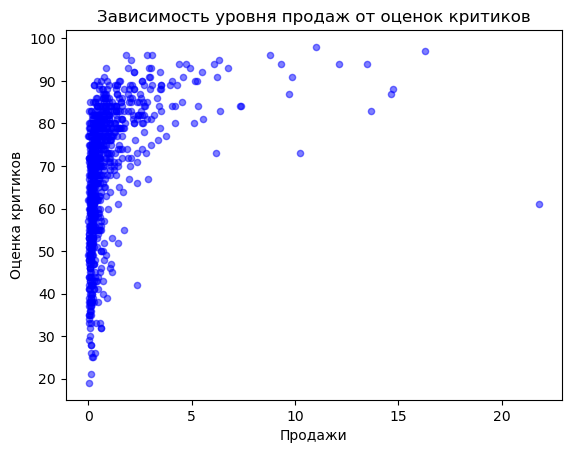

XOne значение корелляция = 0.41699832800840153


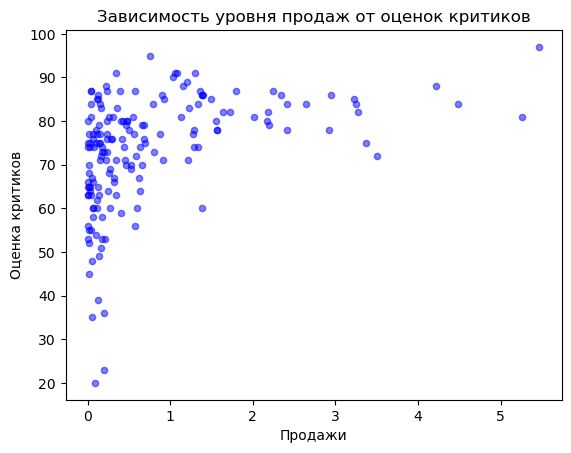

In [30]:
# Смотрим зависимость продаж от оценки критиков 
for i in actual_name:
    df = data_filter.query('platform==@i')
    print(i,'значение корелляция =',df['sum_sales'].corr(df['critic_score']))
    data[data.platform==i].plot(x='sum_sales', y='critic_score',kind='scatter', alpha=0.5,color = "blue");
    plt.title('Зависимость уровня продаж от оценок критиков')
    plt.xlabel('Продажи') 
    plt.ylabel('Оценка критиков')
    plt.show()
    

*  По графику и коэффициенту корелляции понятно что сильной зависимости между оценкой критиков и продажами нет. Максимальный коэффициент составляет 0.41, что является средней зависимостью. Кроме того у части платформ наблюдается обратная связь между оценками и продажами.

3DS значение корелляция = 0.19758263411038596


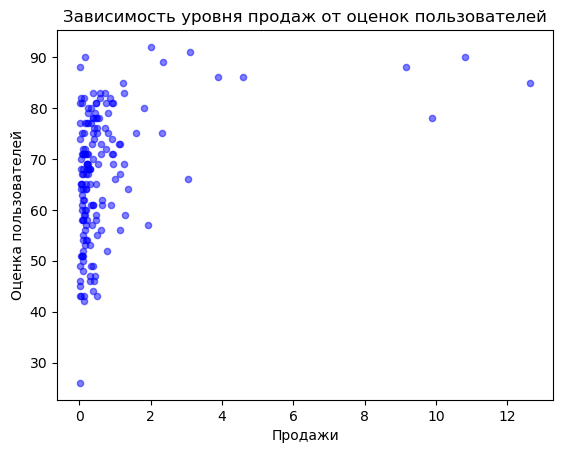

PC значение корелляция = -0.12186747630735571


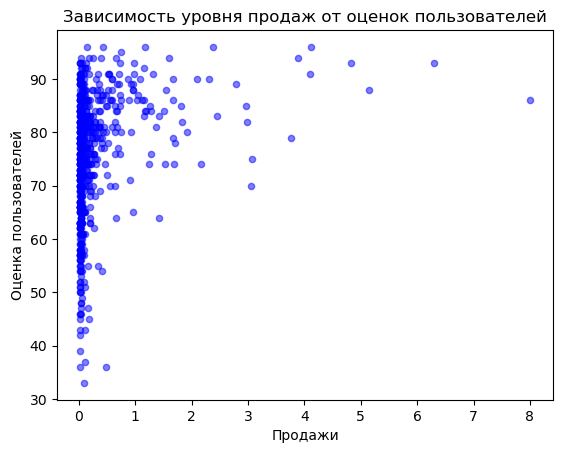

PS3 значение корелляция = -0.005143522887113828


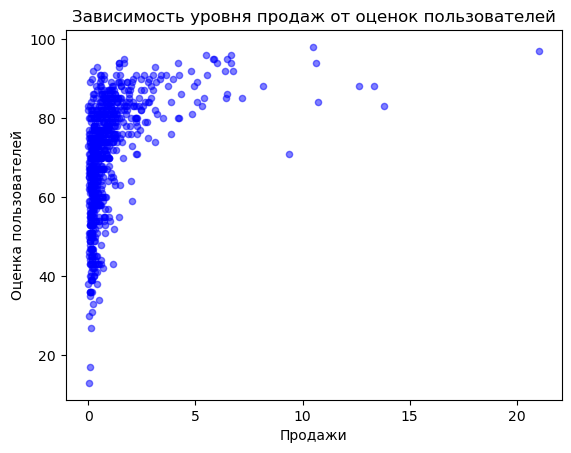

PS4 значение корелляция = -0.03195711020455643


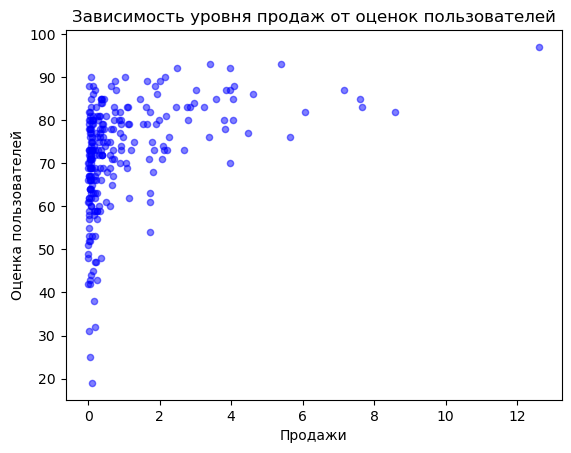

PSV значение корелляция = -0.004339437514314884


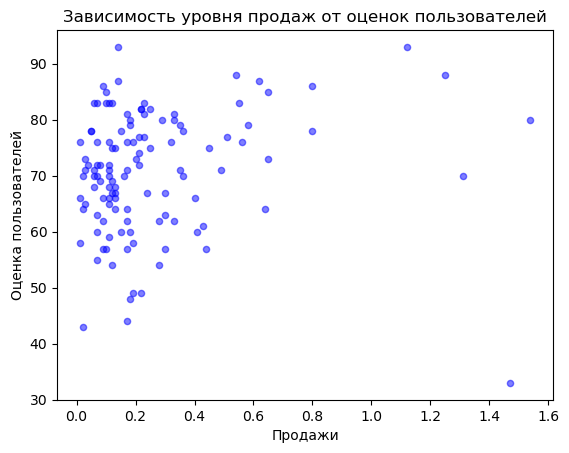

Wii значение корелляция = 0.29619680007479526


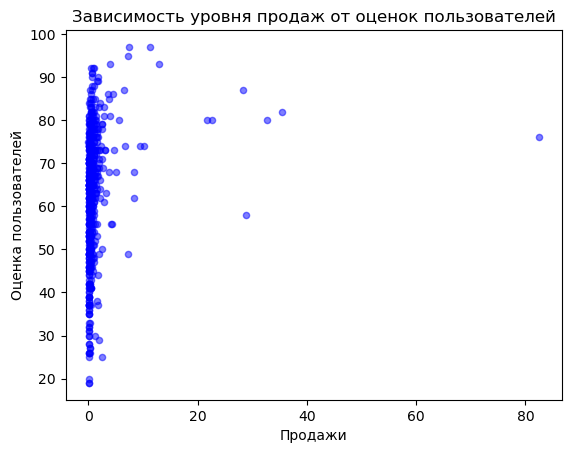

WiiU значение корелляция = 0.4002190202148619


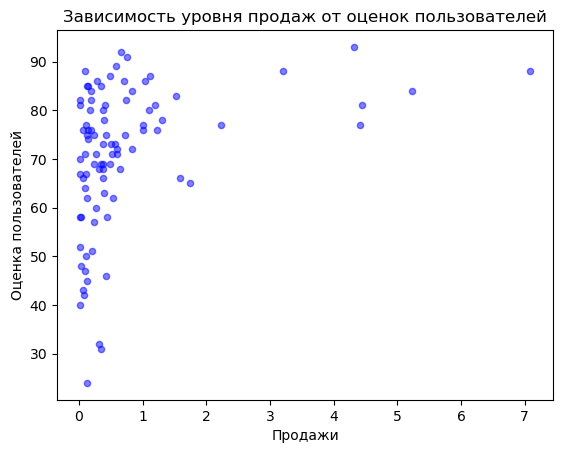

X360 значение корелляция = 0.0061639786462133585


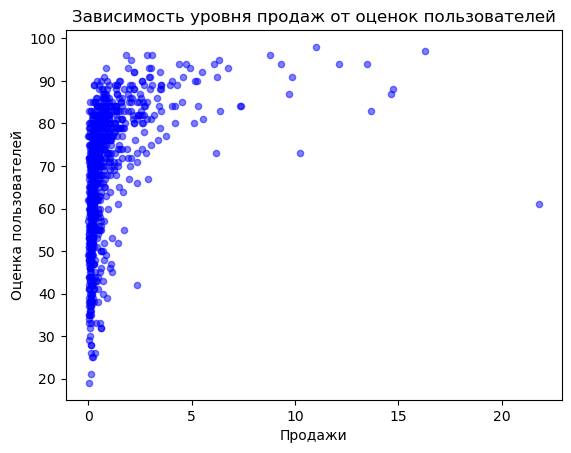

XOne значение корелляция = -0.06892505328279418


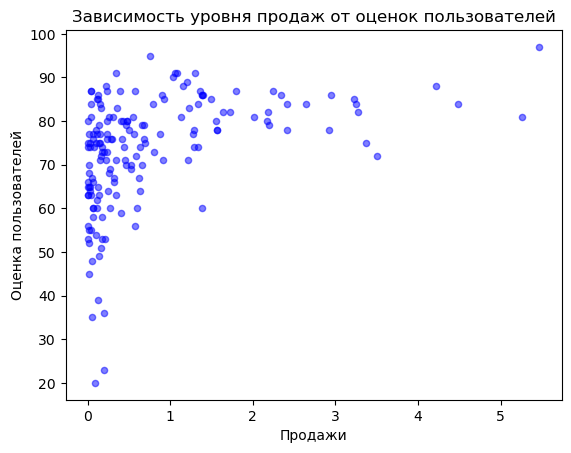

In [31]:
# Смотрим зависимость продаж от оценки пользователей
for i in actual_name:
    df = data_filter.query('platform==@i')
    print(i,'значение корелляция =',df['sum_sales'].corr(df['user_score']))
    data[data.platform==i].plot(x='sum_sales', y='critic_score',kind='scatter', alpha=0.5,color = "blue")
    plt.title('Зависимость уровня продаж от оценок пользователей')
    plt.xlabel('Продажи') 
    plt.ylabel('Оценка пользователей')
    plt.show()

* За исключением платформы WiiU с коэффициентом 0.4, у остальных платформ околонулевая зависимость продаж от оценки пользователей

In [32]:
# Смотрим распределение игр по жанрам
data_filter.genre.value_counts()

Action          953
Role-Playing    339
Sports          256
Adventure       247
Shooter         235
Misc            180
Racing          115
Fighting        105
Platform         83
Simulation       78
Strategy         67
Puzzle           24
Name: genre, dtype: int64

In [33]:
#Считаем суммарные продажи по жанрам
for i in data_filter.genre.value_counts().index.values:
    df = data_filter.query('genre==@i')
    print('Глобальные продажи у',i,round(df.sum_sales.sum(),2))

Глобальные продажи у Action 435.54
Глобальные продажи у Role-Playing 180.91
Глобальные продажи у Sports 179.55
Глобальные продажи у Adventure 27.7
Глобальные продажи у Shooter 304.73
Глобальные продажи у Misc 84.15
Глобальные продажи у Racing 53.5
Глобальные продажи у Fighting 44.13
Глобальные продажи у Platform 60.31
Глобальные продажи у Simulation 34.85
Глобальные продажи у Strategy 12.63
Глобальные продажи у Puzzle 4.79


* Наибольшие продажи у таких жанров, как: Action, Shooter,Role-Playing. Наименьшие у жанров: Puzzle, Adventure, Strategy

In [34]:
#Считаем средние продажи по жанрам
for i in data_filter.genre.value_counts().index.values:
    df = data_filter.query('genre==@i')
    print('Средние продажи у',i,round(df.sum_sales.mean(),2))
    

Средние продажи у Action 0.46
Средние продажи у Role-Playing 0.53
Средние продажи у Sports 0.7
Средние продажи у Adventure 0.11
Средние продажи у Shooter 1.3
Средние продажи у Misc 0.47
Средние продажи у Racing 0.47
Средние продажи у Fighting 0.42
Средние продажи у Platform 0.73
Средние продажи у Simulation 0.45
Средние продажи у Strategy 0.19
Средние продажи у Puzzle 0.2


* Если брать средние продажи, то наибольшие продажи у жанров: 1)Shooter 2)Platform 3)Sports. Наименьшие у жанров: 1)Adventure 2)Strategy 3)Puzzle

## Составление портрета пользователя  <a id='portrait'></a>

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,na_sales,eu_sales,jp_sales
platform,,,
PC,19.12,37.76,0.00
XOne,93.12,51.59,0.34
X360,140.05,74.52,1.57
Wii,17.45,11.92,3.39
WiiU,38.10,25.13,13.01
PS4,108.74,141.09,15.96
PSV,10.98,11.36,21.04
PS3,103.38,106.86,35.29
3DS,55.31,42.64,87.79


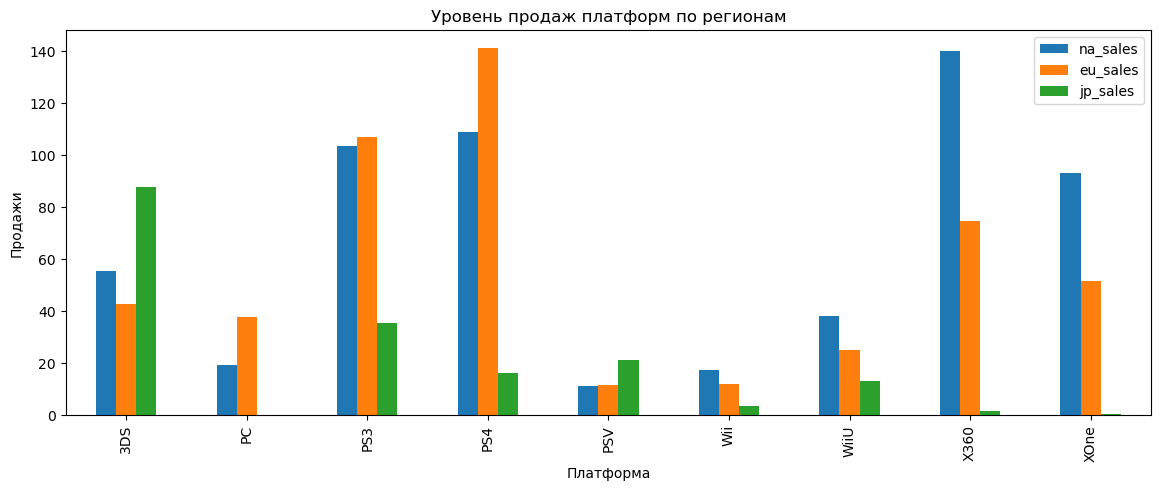

In [35]:
# Смотрим продажи платформ по регионам
sales_df = data_filter[['na_sales']+['eu_sales']+['jp_sales'] + ['platform']+['genre']]
sales_df.groupby('platform').sum().plot(kind='bar', figsize=(14,5))
plt.title('Уровень продаж платформ по регионам')
plt.xlabel('Платформа') 
plt.ylabel('Продажи')
sales_df.groupby('platform').sum().sort_values('jp_sales')

Распределение ТОП-5 платформ по регионам следующее 
* NA:1) X360 2) Wii 3) PS3 4) PS4 5) XOne. 
* EU: 1) PS3 2) X360 3) Wii 4) PS4 5) PC.  
* JP: 1) 3DS 2) PS3 3) Wii 4) PSV 5) WiiU



,na_sales,eu_sales,jp_sales
genre,,,
Action,177.00,158.43,49.18
Shooter,144.77,113.47,9.23
Sports,81.38,68.84,6.98
Role-Playing,60.65,46.76,59.12
Racing,17.22,27.29,2.50
Misc,38.13,25.95,12.45
Platform,25.17,20.98,8.63
Simulation,7.86,14.47,10.35
Fighting,19.79,10.79,9.08


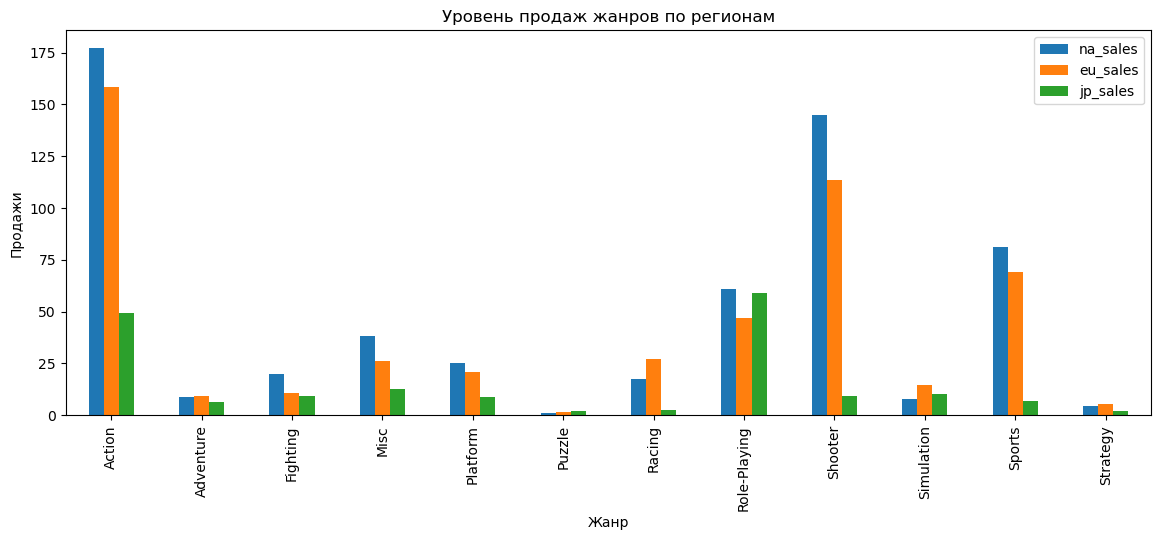

In [36]:
# Смотрим продажи жанров по регионам
sales_df = data_filter[['na_sales']+['eu_sales']+['jp_sales'] + ['platform']+['genre']]
sales_df.groupby('genre').sum().plot(kind='bar', rot=90, figsize=(14,5))
plt.title('Уровень продаж жанров по регионам')
plt.xlabel('Жанр') 
plt.ylabel('Продажи')
sales_df.groupby('genre').sum().sort_values( 'eu_sales',ascending=False)

Распределение ТОП-5 жанров по регионам следующее:
* NA:1) Action 2) Shooter 3) Sports 4) Role-Playing 5) Misc. 
* EU: 1) Action 2) Sports 3) Shooter 4) Role-Playing 5) Racing.  
* JP: 1) Role-Playing 2) Action 3) Misc 4)Simulation  5) Shooter



In [37]:
#Смотрим какие есть рейтинги у игр
data_filter.rating.unique()

array(['M', 'unknown', 'E', 'E10+', 'T'], dtype=object)

In [38]:
#Смотрим продажи различных рейтингов в NA
for i in data_filter.rating.value_counts().index.values:
    df = data_filter.query('rating==@i')
    na_df = data_filter.na_sales.sum()
    print('Продажи в NA',i,round(df.na_sales.sum(),2),',','доля составляет',round(df.na_sales.sum()/na_df*100),'%')

Продажи в NA unknown 100.13 , доля составляет 17 %
Продажи в NA M 231.57 , доля составляет 40 %
Продажи в NA T 66.02 , доля составляет 11 %
Продажи в NA E 113.44 , доля составляет 19 %
Продажи в NA E10+ 75.09 , доля составляет 13 %


In [39]:
#Смотрим продажи различных рейтингов в EU

for i in data_filter.rating.value_counts().index.values:
    df = data_filter.query('rating==@i')
    eu_df=data_filter.eu_sales.sum()
    print('Продажи в EU',i,round(df.eu_sales.sum(),2),',','доля составляет',round(df.eu_sales.sum()/eu_df*100),'%')

Продажи в EU unknown 89.32 , доля составляет 18 %
Продажи в EU M 193.96 , доля составляет 39 %
Продажи в EU T 52.96 , доля составляет 11 %
Продажи в EU E 111.79 , доля составляет 22 %
Продажи в EU E10+ 54.84 , доля составляет 11 %


In [40]:
#Смотрим продажи различных рейтингов в JP
for i in data_filter.rating.value_counts().index.values:
    df = data_filter.query('rating==@i')
    jp_df=data_filter.jp_sales.sum()
    print('Продажи в JP',i,round(df.jp_sales.sum(),2),',','доля составляет',round(df.jp_sales.sum()/jp_df*100),'%')

Продажи в JP unknown 95.62 , доля составляет 54 %
Продажи в JP M 21.2 , доля составляет 12 %
Продажи в JP T 25.76 , доля составляет 14 %
Продажи в JP E 27.62 , доля составляет 15 %
Продажи в JP E10+ 8.19 , доля составляет 5 %


* Доля продаж игр с рейтингом M практически одинакова в NA и EU 40% и 39% соответственно, в JP игры с таким возрастным рейтингом занимают всего 12% продаж. Второе место в NA и EU занимают игры с рейтингом E 19% и 22%.В JP наиболее популярны игры с неизвестным возрастным рейтингом, второе место занимают игры рейтинга Е 15%. Скорее всего особенности рынка JP связагы с большим количеством внутреннего продукта, который не проходит проверку на рейтинг ESRB. Возможно у этих игр есть собственный рейтинг для внутреннего рынка.


## Составление гипотез <a id='hypothesis'></a>

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза в данном иследовании будет такая: пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза: пользовательские рейтинги платформ Xbox One и PC отличаются. Так как в нашем случае не имеет значение рейтинг больше или меньше, то используем проверку двусторонней гипотезы

In [41]:
# Делаем выборку по нужным платформам
data_xbox = data_filter.query('platform =="XOne" ')
data_xbox = data_xbox.dropna()
data_pc = data_filter.query('platform =="PC" ')
data_pc = data_pc.dropna()
print(len(data_xbox), len(data_pc))

165 197


In [42]:
# Используем гипотезу о равенстве двух генеральных совокупностей
rating_xbox = data_xbox.user_score
rating_pc = data_pc.user_score
alpha = .05
results = st.ttest_ind(rating_xbox, rating_pc)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

p-значение: 0.5991315923632393
Не получилось отвергнуть нулевую гипотезу


По результатам проверки двух генеральных совокупностей можно сказать что гипотеза об одинаковом распределении пользовательских рейтинг не соответствует действительности. Для проверки было исппользовано значение alpha равное 5%, но изменение до 1% не повлияет на результат.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза в данном иследовании будет такая: Средние пользовательские рейтинги жанров Action  и Sports  равны. Альтернативная гипотеза: пользовательские рейтинги платформ Xbox One и PC отличаются. Так как в нашем случае не имеет значение рейтинг больше или меньше, то используем проверку двусторонней гипотезы

In [43]:
# Делаем выбопку по нужным жанрам
data_action = data_filter.query('genre =="Action" ')
data_action = data_action.dropna()
data_sports = data_filter.query('genre =="Sports" ')
data_sports = data_sports.dropna()
print(len(data_sports), len(data_action))

141 432


In [44]:
# Используем гипотезу о равенстве двух генеральных совокупностей
rating_action = data_action.user_score
rating_sports = data_sports.user_score
alpha = .05
# так как выборки отличаются в три раза по размеру используем аргумент equal_var = False
results = st.ttest_ind(rating_action, rating_sports,equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.858072645452818e-14
Отвергаем нулевую гипотезу


Так как нулевая гипотеза звучала что рейтинги равны, то используя гипотезу о равенстве генеральных совокупностей мы получили результат что нулевая гипотеза не соответствует действительности.

## Вывод:  <a id='conclusion'></a>

По результатам анализа предоставленной информации можно сделать следующие выводы:
* На протяжении последних  6 лет наблюдается мировой тренд на снижение продаж игр.
* Самым крупным рынком является NA, следом идет EU, затем JP.
* За последние два года только две платформы показывают рост - это новые платформы XOne и PS4.
* Наиболее популярными жанрами по регионам являются NA:1) Action 2) Shooter 3) Sports 4) Role-Playing 5) Misc. EU: 1) Action 2) Sports 3) Shooter 4) Role-Playing 5) Racing. JP: 1) Role-Playing 2) Action 3) Misc 4)Simulation 5) Shooter.
* На различных платформах пользовательские рейтинги распределяются по разному
* По распределению жанров и возрастному рейтингу рынки EU и NA схожи, рынок JP  имеет значительные отличия, скорее всего связанные с менталитетом.


Наиболее перспективными можно назвать игры выпущенные на платформах XOne и PS4 для рынков NA и EU в жанре  Shooter с возрастным рейтингом М. Для оценки успешности игры для рынка JP необходимо провести дополнительное исследование.